<h2>Applied ML: Model Evaluation and Selection</h2>

In [1]:
# !pip install matplotlib
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


<h3>Model accuracy and class imbalance in classification problems<h3>

In [2]:
# load digit dataset
from sklearn.datasets import load_digits

# check class imbalance
dataset = load_digits()
X, y = dataset.data, dataset.target

# check class size in training and labels
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
  print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [3]:
# Create class imbalce dataset 

# get a fresh copy of orginal data
y_binary_imbalanced = y.copy()
# create class imbaclance by setting all labels to 0 except label 1
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels: {}'.format(y[1:30]))
print('New binary labels: {}'.format(y_binary_imbalanced[1:30]))

# bin count and check class imbalance
print('Class imbalance: {}'.format(np.bincount(y_binary_imbalanced)))
                                           

Original labels: [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels: [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Class imbalance: [1615  182]


**SVM classifier using the imbalanced data**

In [4]:
from sklearn.svm import SVC
# split dataset with class imbalance to training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced,
                                                    random_state=0)
# instantiate Support Vector Machine classifier
# fit training data and targer
svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
# get accuracy using the score method on test data
test_score = svm.score(X_test, y_test)
print("Accuracy of SVC on test data {}%".format(test_score*100))


Accuracy of SVC on test data 90.88888888888889%


**Dummy classifier using the imbalanced data to see if the 91% of SVM classifier really impressive**

In [5]:
# get dummy classifier class 
from sklearn.dummy import DummyClassifier
# instantiate and set the stategy for the DummyClassifier
# the DummyClassifier doesn't loolup the X_train, but use 
# the most frequent class in the y_train
dummy_majority = DummyClassifier(strategy= 'most_frequent').fit(X_train,
                                                             y_train)
# get prediction
y_dummy_prediction = dummy_majority.predict(X_test)
dummy_score = dummy_majority.score(X_test, y_test)
# get accuracy
print("Accuracy of dummy classifier on test data {}%".format(dummy_score*100))

Accuracy of dummy classifier on test data 90.44444444444444%


- The dummy classifiers serve as a sanity check on classifier's preformance
- Provide null metric baseline, i.e. the accuracy that can be achived by picking always the using  the most frequent class

- When the classifier accuracy is close to the null accuracy baseline, it could mean 
  - ineffective or missing features
  - poor choice of kernel or hyperparameter
  - large class imbalance


In [6]:
# for example if we change the kernel for SVC from 'rbf' to linear
# accuracy improve to 97%-- highlighting the poor kernel choice
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
# get accuracy using the score method on test data
test_score = svm.score(X_test, y_test)
print("Accuracy of SVC with linear kernel on test data {}%".format(test_score*100))

Accuracy of SVC with linear kernel on test data 97.77777777777777%


<h3>Confusion matrix</h3>
  
  Binary(two-class) confusion matrix

In [7]:
# import cofusion_matrix class
from sklearn.metrics import confusion_matrix

# fit DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
# get prediction
y_majorit_predicted = dummy_majority.predict(X_test)
# get confusion matrix between actual and predicted value
confusion_matrix_dummy = confusion_matrix(y_test, y_majorit_predicted)
print('Most frequent claas from dummy classifier \n {}'.format(confusion_matrix_dummy))

Most frequent claas from dummy classifier 
 [[407   0]
 [ 43   0]]


using `statified` stategy

In [8]:
# fit DummyClassifier
dummy_majority = DummyClassifier(strategy='stratified').fit(X_train, y_train)
# get prediction
y_majorit_predicted = dummy_majority.predict(X_test)
# get confusion matrix between actual and predicted value
confusion_matrix_ = confusion_matrix(y_test, y_majorit_predicted)
print('Most frequent claas from dummy classifier \n {}'.format(confusion_matrix_))

Most frequent claas from dummy classifier 
 [[362  45]
 [ 37   6]]


Confusion matrix from SVM with `linear` kernel

In [9]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confsion = confusion_matrix(y_test, svm_predicted)
print("SVM classifier (linear kernel) \n {}".format(confsion))

SVM classifier (linear kernel) 
 [[402   5]
 [  5  38]]


Confusion matrix for Decision Tree Classififer

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dtree.predict(X_test)
confusion_tree = confusion_matrix(y_test, tree_predicted)
print("DT classifier \n {}".format(confusion_tree))

DT classifier 
 [[400   7]
 [ 17  26]]


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n {}'.format(confusion))

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


**Evaluation metrices for binary classification: Interpreting confusion matrix**

**Recall** is also known as True Positive Rate,
Sensitivity or Probability of detection
- what fraction of all positive instances does the classifier correctly identify as positive

- in the confusion_tree matrix

`Recall = TP/(TP+FN)
                   = 26/(26+17)`
- practical example. Tumor detection. Here we want `lower precision, high recall` since we want to detect all tumors

**Recall-oriented ML tasks**:
 - search and information extraction in legal discovery
 - Tumor detection
 
**Precision**  asks what fraction of `positive` prediction are correct
- when its really important to avoid False Positives, i.e. we want to be very confident the prediction is correct
- example: customer facting prediction, weather to show web query-- we might want higher precion (lower recall) by decreasing `FP` or incresing `TP` 

`Precision = TP/(TP+FP)
                   = 26/(26+7)`

  **Precision-oriented ML tasks**:
  - Search engine ranking
  - Query suggestion
  - Document classification
  - Customer-facing task

**False positive rate (FPR)**
- what fraction of all negative istance does the classififer incorrectly identify as positive.
- also called Specificity

`FPR = FP/(TN+FP)
                   = 7/(400+7)`
                   
**F1-score**:
  - combine precision & recall into a single number-- based on the harmonic meano
  
  `F1 = 2*Precision*Recall/)Precision+Recall)`
  
**F-score** generalizes F1-score using a constant called beta term
  




**Evaluation metrics for binary classification**

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [13]:
96/(96+8)

0.9230769230769231

In [14]:
# summary report
from sklearn.metrics import classification_report

print(classification_report(y_test, 
                            tree_predicted, 
                            target_names=['not one', 'one']))  # able class as not one and one

             precision    recall  f1-score   support

    not one       0.96      0.98      0.97       407
        one       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



<h3>Precision-Recall Curves</h3>
- The "ideal" point in P-R is with Precion=Recall=1
- `Steepness` of P-R curves is important because maximizing precision (x-axis) while maximizing recall(y-axis )


**Decision functions**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.17679843104063),
 (0, -13.541351297539375),
 (0, -21.722755483347314),
 (0, -18.90759495884316),
 (0, -19.736013047041105),
 (0, -9.749531766287463),
 (1, 5.234860284274221),
 (0, -19.307233639658737),
 (0, -25.101097576455057),
 (0, -21.827303434511624),
 (0, -24.151219724281432),
 (0, -19.576887418399153),
 (0, -22.574868557925434),
 (0, -10.823638284960886),
 (0, -11.91240280524501),
 (0, -10.979521276798177),
 (1, 11.205987570162906),
 (0, -27.6458123003256),
 (0, -12.859472521338612),
 (0, -25.84861656033925)]

In [16]:
# prediction probability
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.598306989611374e-11),
 (0, 1.315432141752112e-06),
 (0, 3.680177808012322e-10),
 (0, 6.1446584384846906e-09),
 (0, 2.6837101457583817e-09),
 (0, 5.8316357765127353e-05),
 (1, 0.9946999695128653),
 (0, 4.120758106614816e-09),
 (0, 1.2551737103821259e-11),
 (0, 3.315489165700056e-10),
 (0, 3.2445639533917993e-11),
 (0, 3.146779277220491e-09),
 (0, 1.569785348335867e-10),
 (0, 1.9920778760201493e-05),
 (0, 6.705512743500125e-06),
 (0, 1.7044750741207964e-05),
 (1, 0.9999864097611713),
 (0, 9.852937470519726e-13),
 (0, 2.601911958778171e-06),
 (0, 5.943988658474936e-12)]

<h3>Precision-recall curves</h3>


<IPython.core.display.Javascript object>


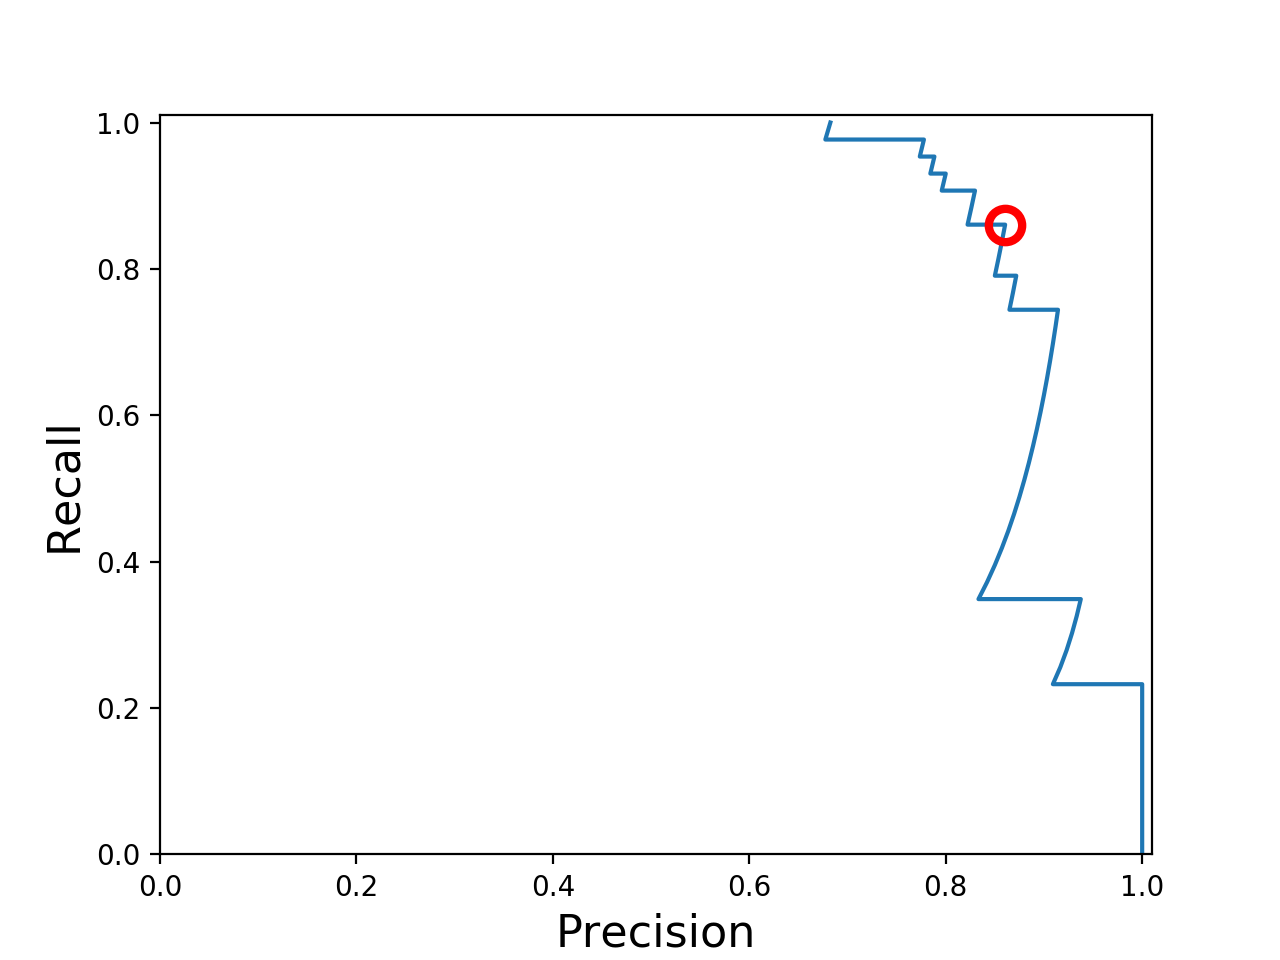

In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(threshold))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', 
         markersize = 12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
# plt.axes().set_aspect('equal')
plt.show()

<h3> ROC curves, Area-Under-Curve(AUC)</h3>

- The ideal point in ROC space is at False positive rate of zero and True positive rate of one
- `Steepness` of ROC curves shows increase in `TP` rate and a decrease of `FP` rate


<IPython.core.display.Javascript object>


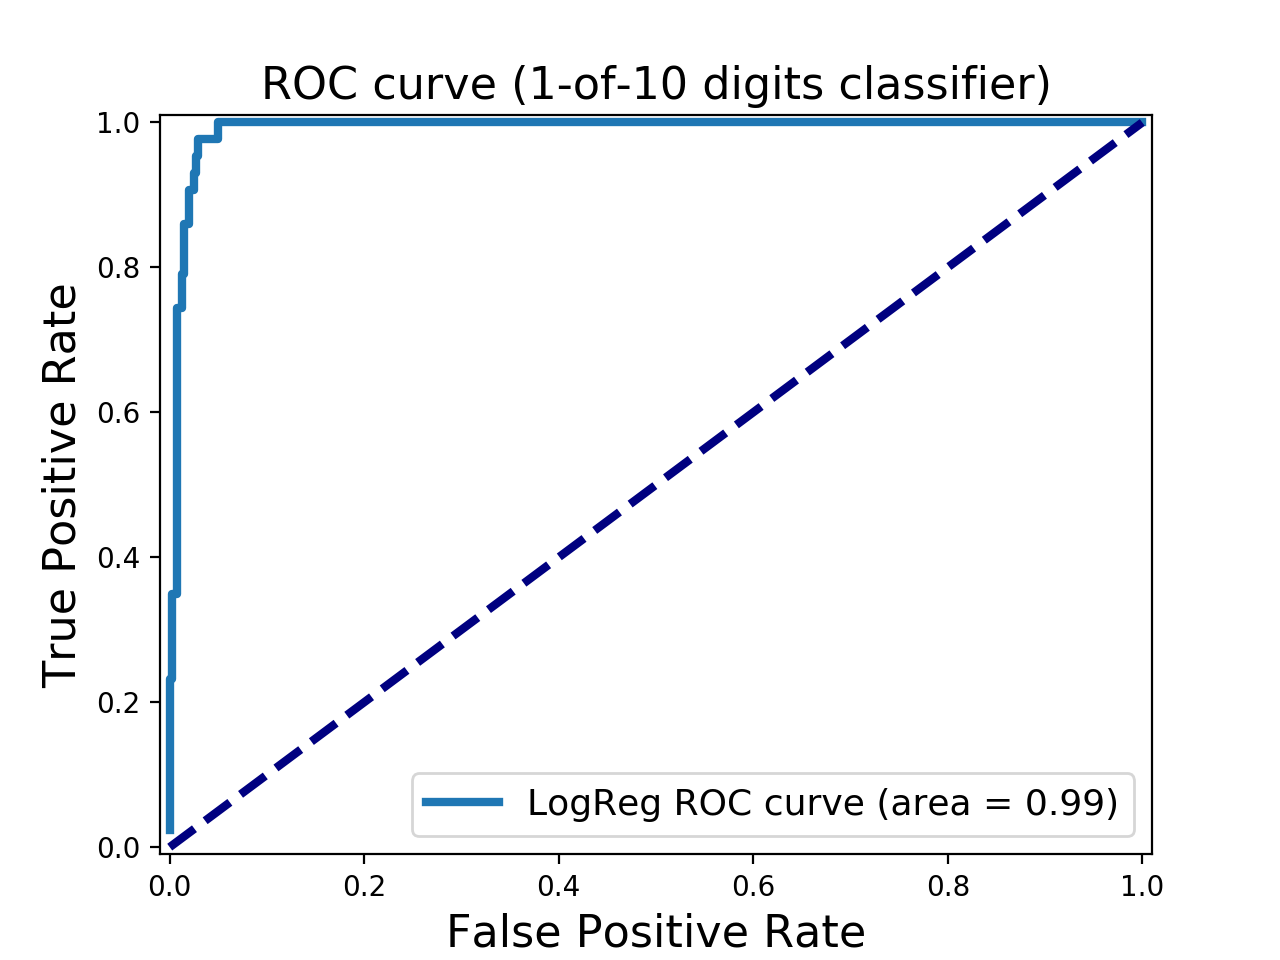

In [18]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogReg ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0,1], color='navy', lw=3, linestyle='--')
# plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


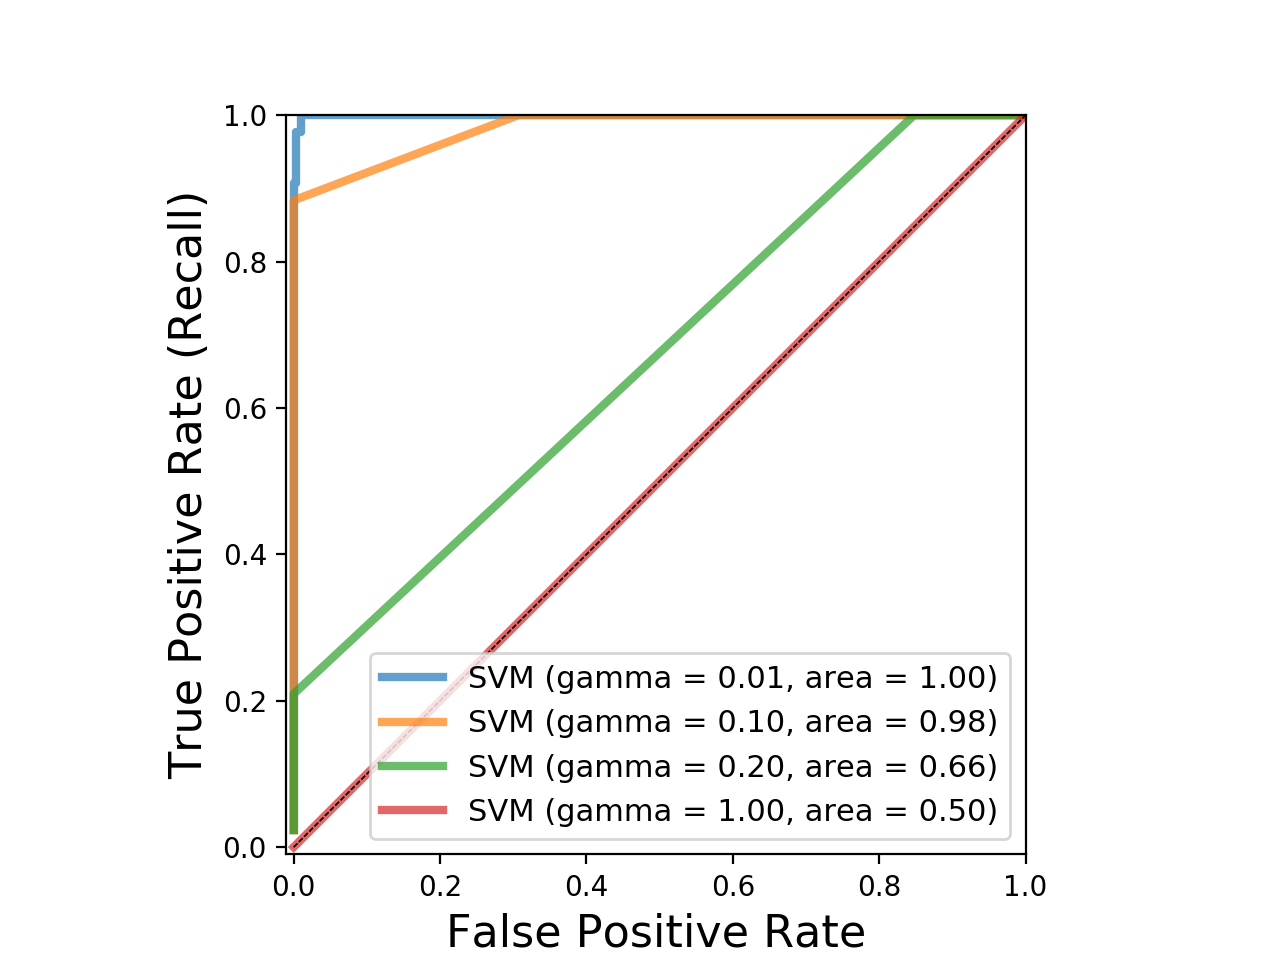

gamma = 0.01 accuracy = 0.91 AUC = 1.00


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


gamma = 0.10 accuracy = 0.90 AUC = 0.98
gamma = 0.20 accuracy = 0.90 AUC = 0.66
gamma = 1.00 accuracy = 0.90 AUC = 0.50


In [19]:
from matplotlib import cm
# get data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# plot
plt.figure()
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
for g in [0.01, 0.1, 0.20, 1]:     # iterate throught differnet gamma value
  svm = SVC(gamma=g).fit(X_train, y_train)
  y_score_svm = svm.decision_function(X_test)
  fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
  roc_auc_svm = auc(fpr_svm, tpr_svm)
  accuracy_svm = svm.score(X_test, y_test)
  print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".
        format(g, accuracy_svm, roc_auc_svm))
  plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7,
          label='SVM (gamma = {:.2f}, area = {:.2f})'.
          format(g, roc_auc_svm))
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)
  plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
  plt.legend(loc='lower right', fontsize=11)
  plt.axes().set_aspect('equal')
  
  plt.show()

<h3>Evaluation measures for multi-Class calssification:</h3>
- collection of true vs predicted binary outcomes, one pre class
- classification report

**Multi-class confusion matrix**

<IPython.core.display.Javascript object>


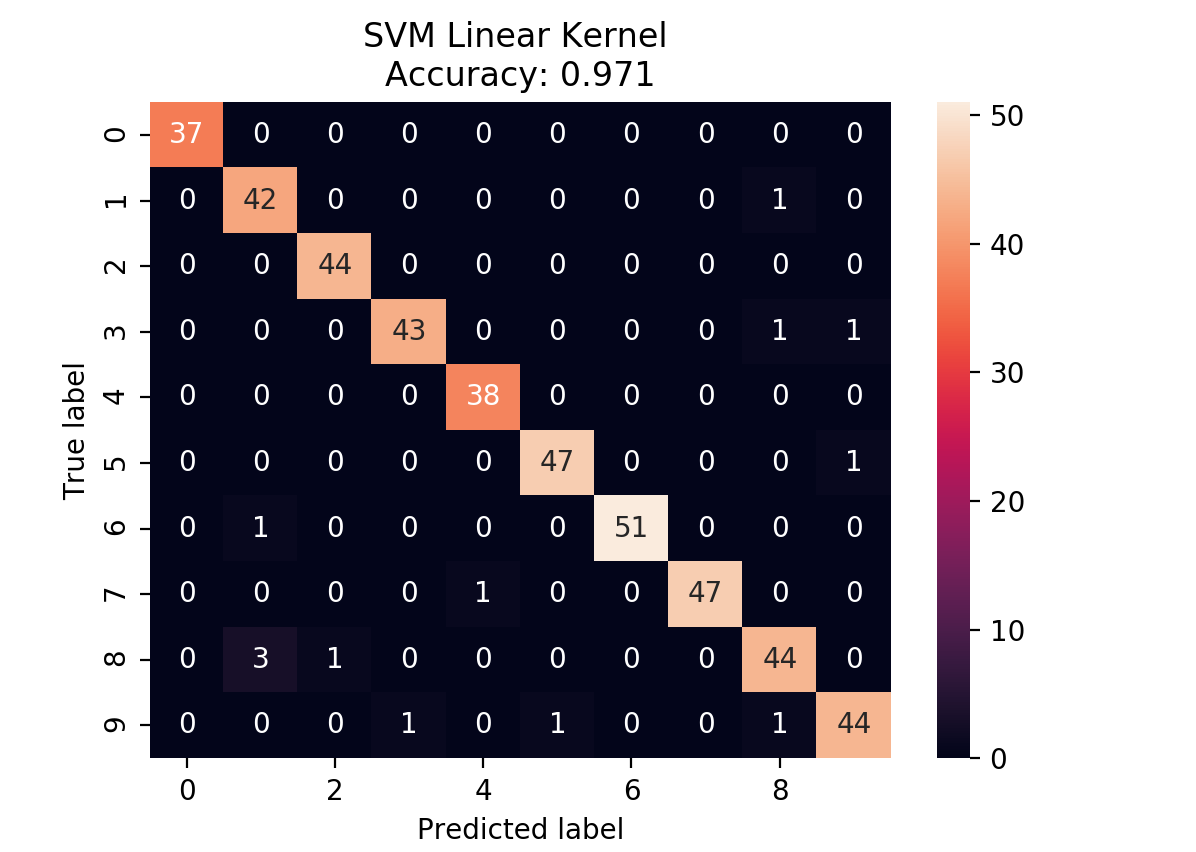

<IPython.core.display.Javascript object>


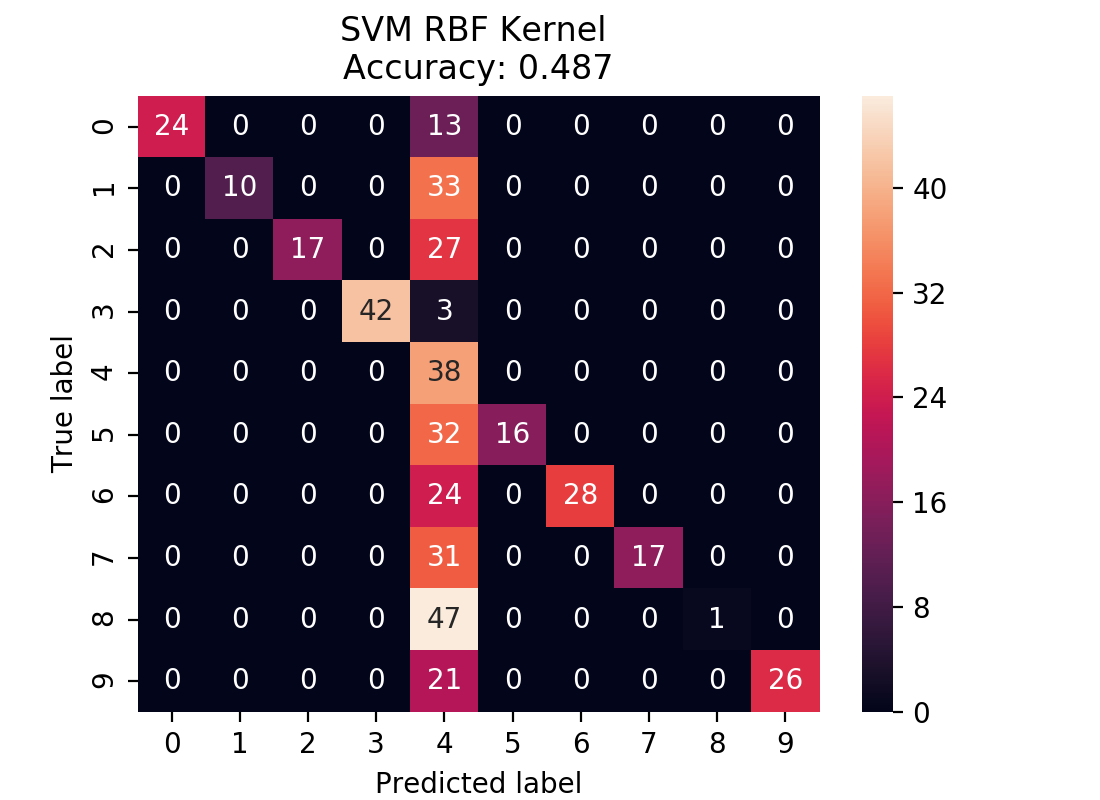

In [32]:
# import seaborn as sns
from matplotlib import cm
from sklearn.metrics import confusion_matrix
dataset = load_digits()   # has 10 classes [0 to 9]
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

svm_mc_1 = SVC(kernel='linear').fit(X_train_mc, y_train_mc)
svm_mc_1_pred = svm_mc_1.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_mc_1_pred)
df_cm_1 = pd.DataFrame(confusion_mc, 
                      index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(1.5,4))
sns.heatmap(df_cm_1, annot=True)
plt.title('SVM Linear Kernel \nAccuracy: {0:.3f}'
          .format(accuracy_score(y_test_mc, svm_mc_1_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# create another classifer to see where the model making missclassification 
svm_mc_2 = SVC(kernel='rbf').fit(X_train_mc, y_train_mc)
svm_mc_2_pred = svm_mc_2.predict(X_test_mc)
confusion_mc_2 = confusion_matrix(y_test_mc, svm_mc_2_pred)
df_cm_2 = pd.DataFrame(confusion_mc_2, 
                      index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5, 4))
sns.heatmap(df_cm_2, annot=True)
plt.title('SVM RBF Kernel \nAccuracy: {0:.3f}'
          .format(accuracy_score(y_test_mc, svm_mc_2_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

Multi-class classsification report
- reports the average metrics computed for each class

In [21]:
print(classification_report(y_test_mc, svm_mc_2_pred))


             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



<h3>Micro vs Macro Average </h3>
- Macro-average:
  - each `class` has equal weight.
  - compute metrics within each class
  - average resulting metrics across classes
  
- Micro-average:
  - each `instance` has equal weight.
  - largest classes have most influence  
  - aggregate outcomes across all classes
  - compute metrics with aggregate outcomes
  
- if the classes have about the same number of instances, macro-and micro-average will be about the same
- if some classes are much larger than others,  use `micro-averaging` to weight the metric toward the largest instance. And use `macro-averaging` to weight the metric toward the smallest instances.
- if the `micro-average` is much lower than the `macro-average` then examine the larger classes for poor metric performance
- if the `macro-average` is much lower than the `micro-average` then examine the smaller classes for poor metric performance
 

In [22]:
# use precision to compute micro-and macro-averaged metrics
print('Micro-averaged precision = {:.2f} (treat instances equally)'.
     format(precision_score(y_test_mc, svm_mc_2_pred, average='micro')))
print('Macro-averaged precision = {:.2f} (treat instances equally)'.
     format(precision_score(y_test_mc, svm_mc_2_pred, average='macro')))

# use F1-score to compute micro-and macro-averaged metrics
print('Micro-averaged f1 = {:.2f} (treat instances equally)'.
     format(f1_score(y_test_mc, svm_mc_2_pred, average='micro')))
print('Macro-averaged f1 = {:.2f} (treat instances equally)'.
     format(f1_score(y_test_mc, svm_mc_2_pred, average='macro')))

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat instances equally)
Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat instances equally)


<h3>Regression evaluation metrics</h3>

- in most cases **r2_score** is enough
  - it computes how well future instances will be predicted
  - best possible score is 1.0
  - constant prediction score is 0.0
- Alternative metrics incluse
  - **mean absolute error (mse)**: absolute difference of target and predicted values -- expected value of L1 norm loss. Commonly used forecast regression analysis in time-series 
  - **mean square error (mse)**: square difference of target and predicted values. This crosponds to the expected value of the L2 norm loss. Widley used for many regression proble and large errors have crrespondingly larger contribution  
  - **median absolute error(mbe)**: roboust to outlies

<h3>Dummy Regressors</h3>
- used as a baseline comparision

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score(linear): 0.06


<IPython.core.display.Javascript object>


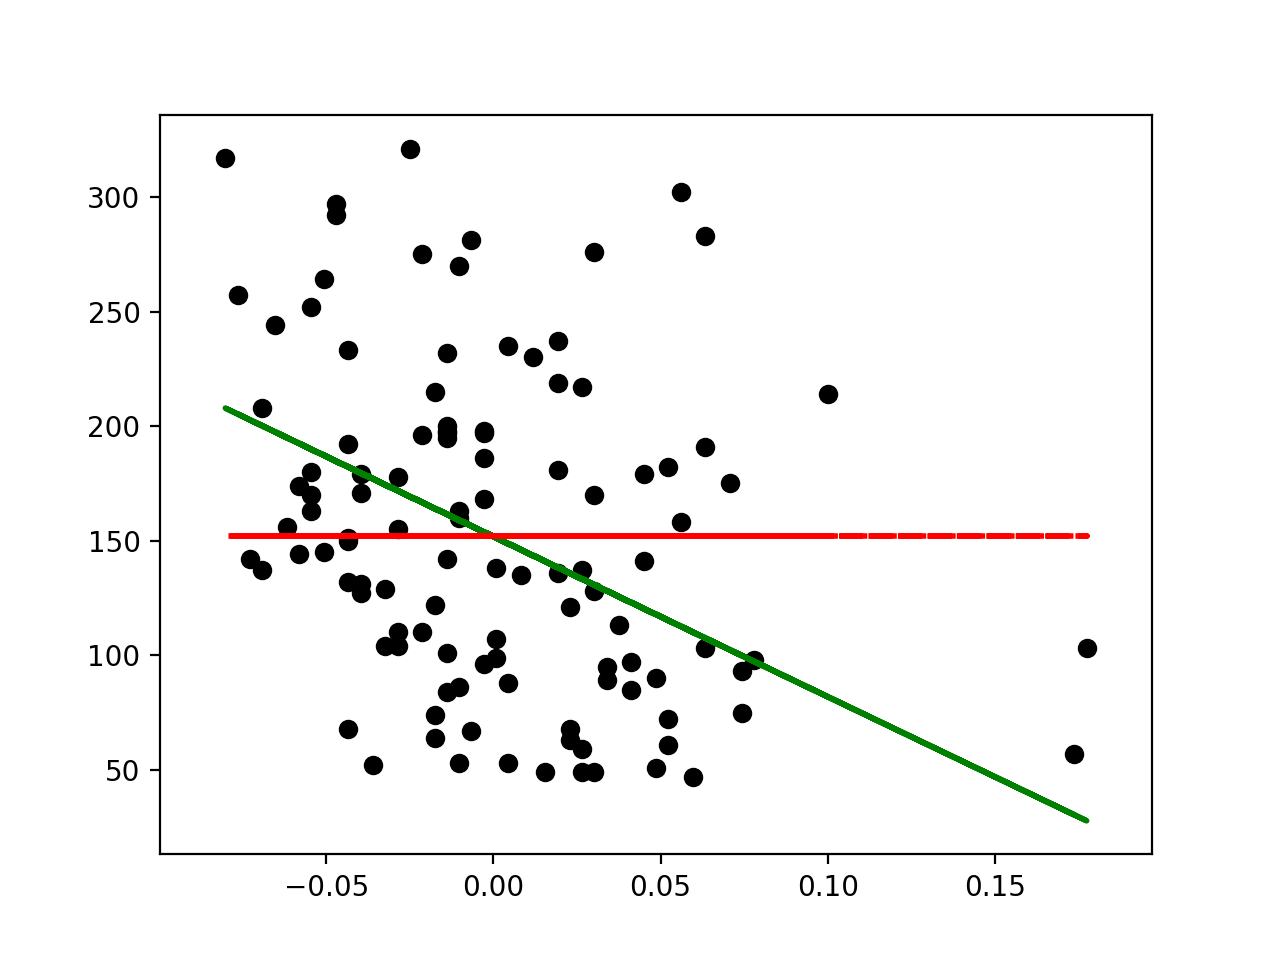

In [35]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn import datasets

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print('Mean squared error (dummy): {:.2f}'
      .format(mean_squared_error(y_test, y_predict_dummy_mean)))
print('Mean squared error (linear model): {:.2f}'
      .format(mean_squared_error(y_test, y_predict)))
print('r2_score (dummy): {:.2f}'
     .format(r2_score(y_test, y_predict_dummy_mean)))
print('r2_score(linear): {:.2f}'
     .format(r2_score(y_test, y_predict)))

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed',
        linewidth=2, label = 'dummy')
plt.show()
     

<h3>Model Selection Using Evaluation Metrics</h3>

** Cross-validation example**

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# get dataset from digits
dataset = load_digits()
# create feature and label dataset
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# define classification model-- Support Vector Machine
clf = SVC(kernel='linear', C=1)

# use the defualt accuracy metrics
print('Cross-validation (accuracy):', 
     cross_val_score(clf, X, y, cv=5))

# use AUC as a score
print('Cross-validation (AUC): ',
     cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))

# use Recall as a validatio score
print('Cross-validation (Recal):',
     cross_val_score(clf, X, y, cv=5, scoring='recall'))


# use Precision as a validatio score
print('Cross-validation (Precision):',
     cross_val_score(clf, X, y, cv=5, scoring='precision'))

Cross-validation (accuracy): [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC):  [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (Recal): [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]
Cross-validation (Precision): [0.57692308 0.97058824 0.88235294 0.90909091 0.85714286]


**Grid search example** for parameter selection
- example using grid search find the value of `gamma` that optimizes a give evaluation merics

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# get dataset from digits
dataset = load_digits()
# create feature and label dataset
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# use the the digits dataset
clf_2 = SVC(kernel='rbf')
# gamma params
grid_values = {'gamma':[0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# grid search for optimal gamma using accuracy score
grid_clf_acc = GridSearchCV(clf_2, param_grid=grid_values)
grid_clf_acc.fit(X_train, y_train)
# get the scores using decision_function
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)

print('Grid best parameter (max. accuracy):', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# search using roc_auc
grid_clf_auc = GridSearchCV(clf_2, param_grid=grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max. accuracy): {'gamma': 0.001}
Grid best score (accuracy):  0.9962880475129918
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.9998741278302142


**List of  evaluation metrics in sklearn.metrics class**

In [26]:
from sklearn.metrics.scorer import SCORERS
print("List of supported evaluation metrics in sklearn:\n")
pd.DataFrame(sorted(list(SCORERS.keys())),columns={'Metric'})

List of supported evaluation metrics in sklearn:



,Metric
0,accuracy
1,adjusted_mutual_info_score
2,adjusted_rand_score
3,average_precision
4,completeness_score
5,explained_variance
6,f1
7,f1_macro
8,f1_micro
9,f1_samples


<h2>Two-feature classification example using the digits dataset</h2>

Optimizing a classifier using different evaluation metrics

**Create plotting util** 

In [67]:
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

def plot_class_regions_subplot(clf, X, y, X_test, y_test, title, 
                               subplot, target_names=None, plot_decision_regions=True):
    """
    Args: classification , train and test dataset, subplot
    Returns: classification plot by region
    """
    numClasses = numpy.amax(y)+1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])
    
    # set fig size
    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50
    
    # set plot boundary
    x_min = X[:,0].min()
    x_max = X[:,0].max()
    y_min = X[:,1].min()
    y_max = X[:,1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), 
                            numpy.arange(y_min-k,y_max+k,h))
    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    
    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha=0.8)
    
    subplot.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=plot_symbol_size,
                   edgecolor='black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_xlim(y_min - y_plot_adjust, y_max + y_plot_adjust)
    
    if (X_test is not None):
        subplot.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap_bold, 
                        s=plot_symbol_size,marker = '^', edgecolor='black')
        train_score = clf.score(X, y)
        test_score = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)
        subplot.set_title(tittle)
        
    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        suplot.legend(loc=0, handles=legend_handles)

def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

<IPython.core.display.Javascript object>


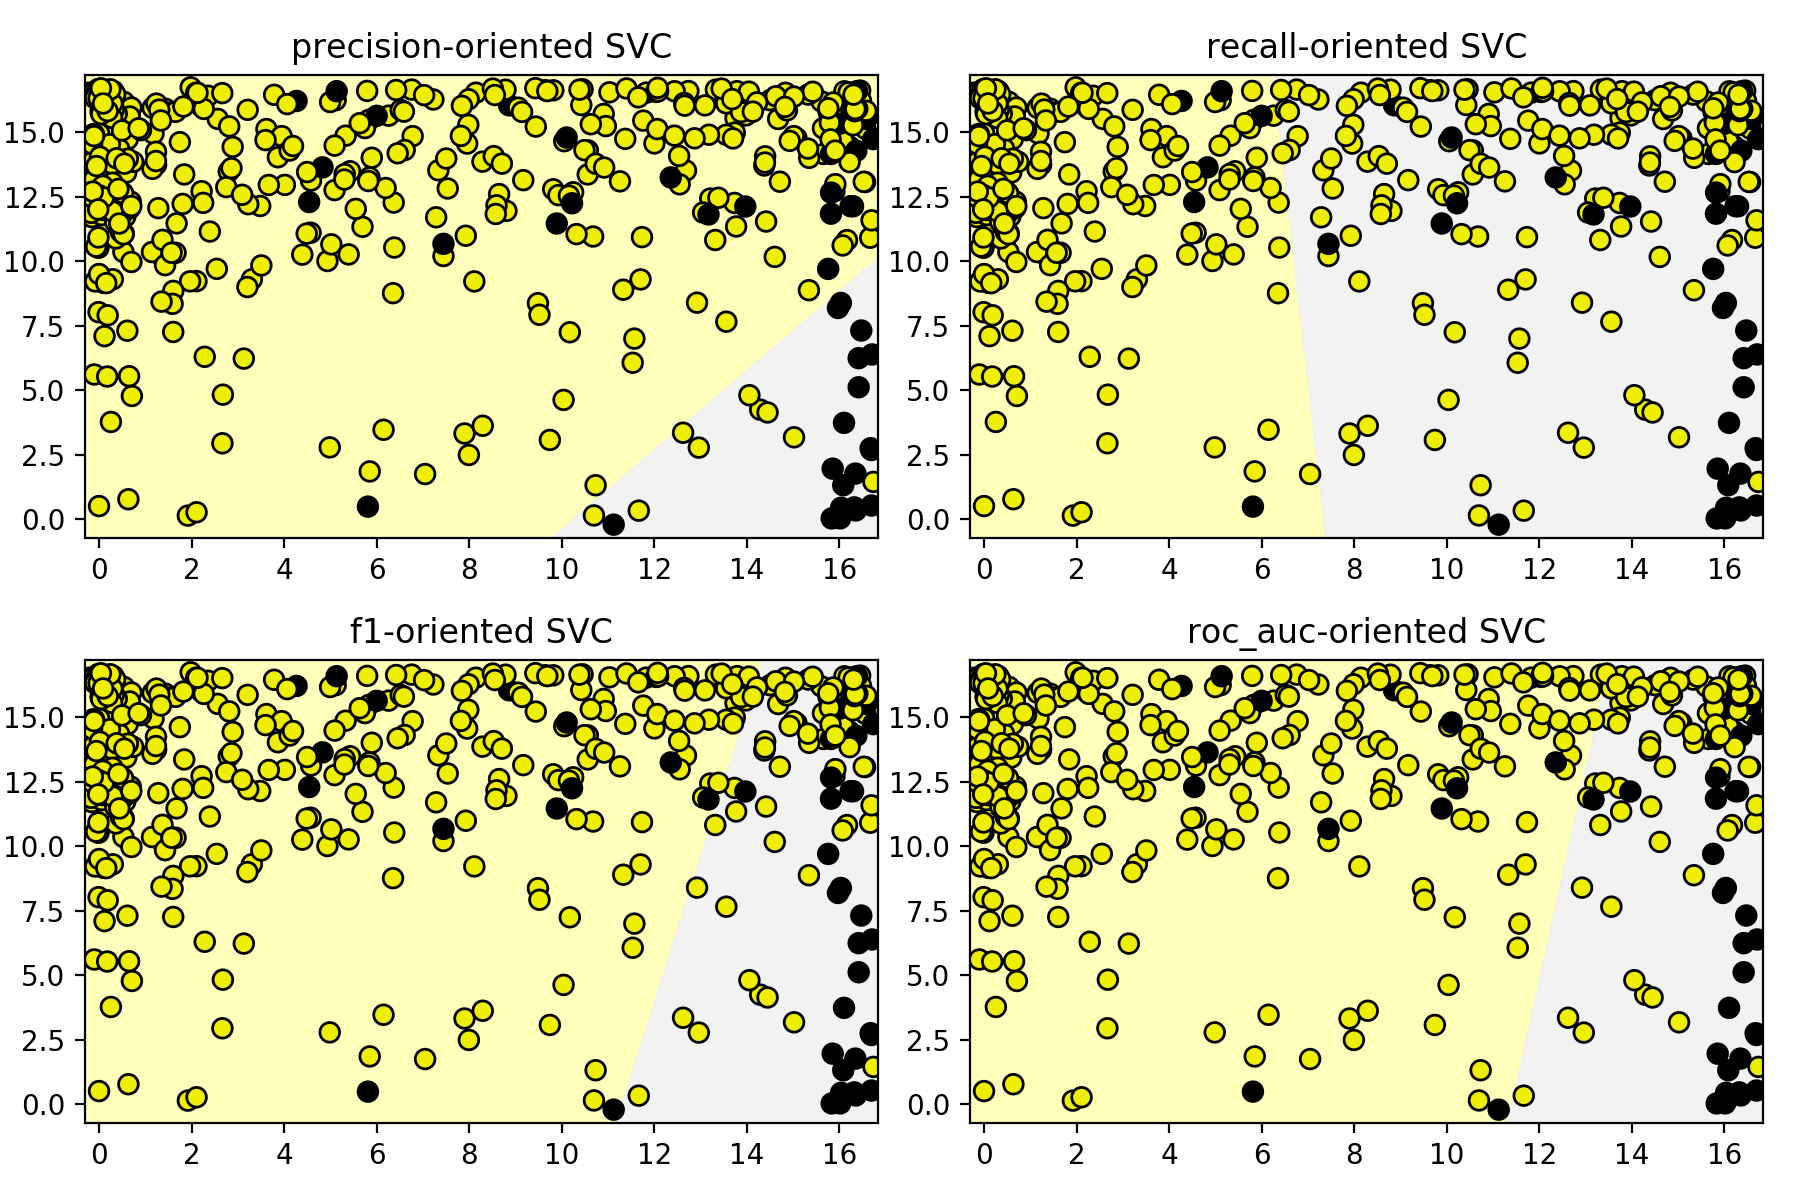

Grid best parameter (max. precision):{'class_weight': {1: 2}}
Grid best score (precision): 0.5495232772131629
Grid best parameter (max. recall):{'class_weight': {1: 50}}
Grid best score (recall): 0.9284310837047003
Grid best parameter (max. f1):{'class_weight': {1: 4}}
Grid best score (f1): 0.5105126507825143
Grid best parameter (max. roc_auc):{'class_weight': {1: 5}}
Grid best score (roc_auc): 0.8911596435311046


In [64]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, roc_auc_score

# load data and split into train and test
dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector 
jitter_delta = 0.25    # perturbb data points for visualization
X_twovar_train = X_train[:,[20, 59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test = X_test[:,[20, 59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

# SVM classification 
cls = SVC(kernel='linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
# create canvas
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision', 'recall','f1', 'roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}):{1}'
         .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
         .format(eval_metric, grid_clf_custom.best_score_))
#     plt.subplot_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

**Precision-recall curve for the defual SVC classifier with balanced class weight**

<IPython.core.display.Javascript object>


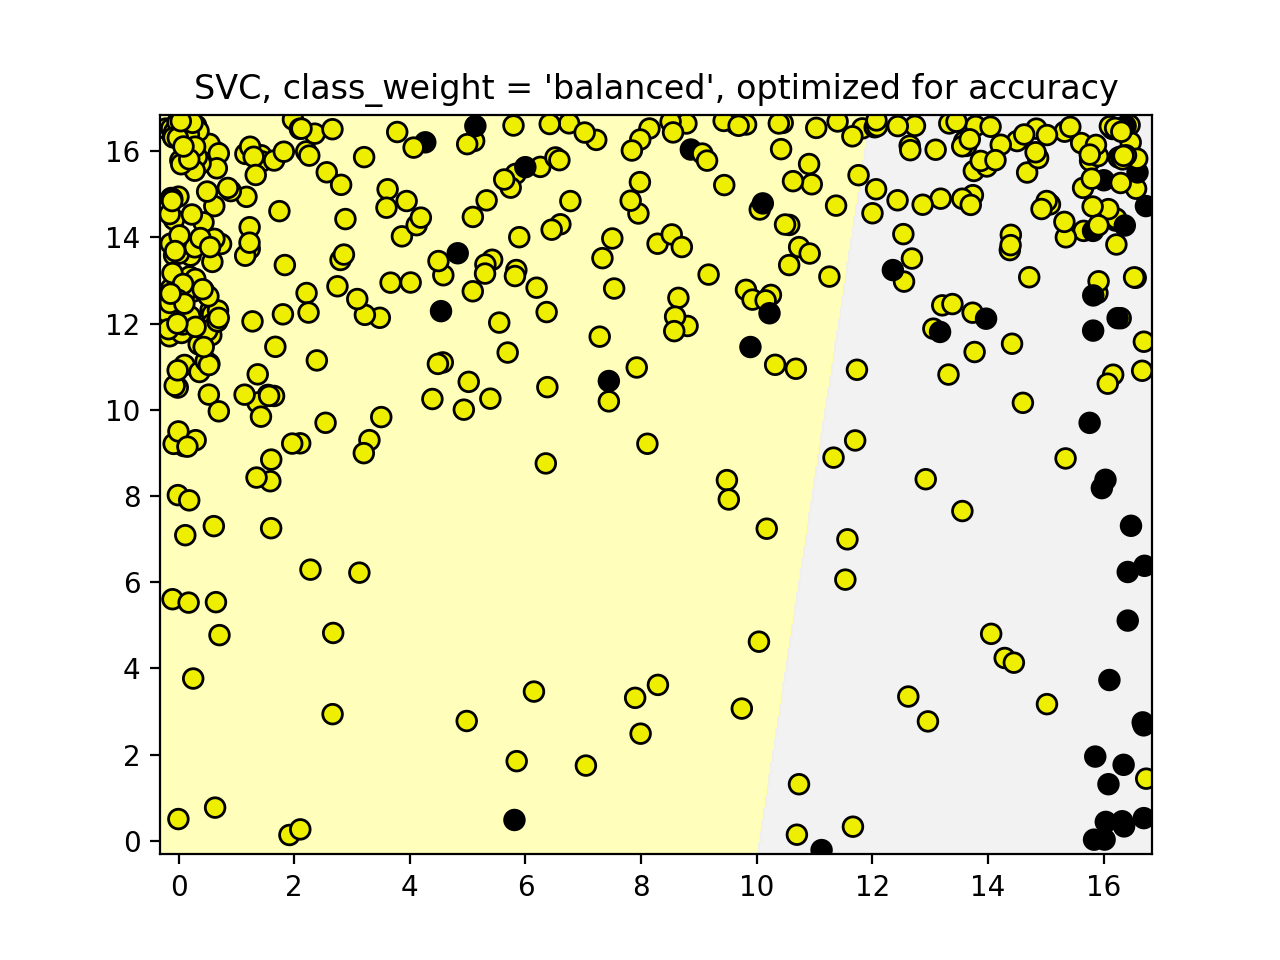

<IPython.core.display.Javascript object>


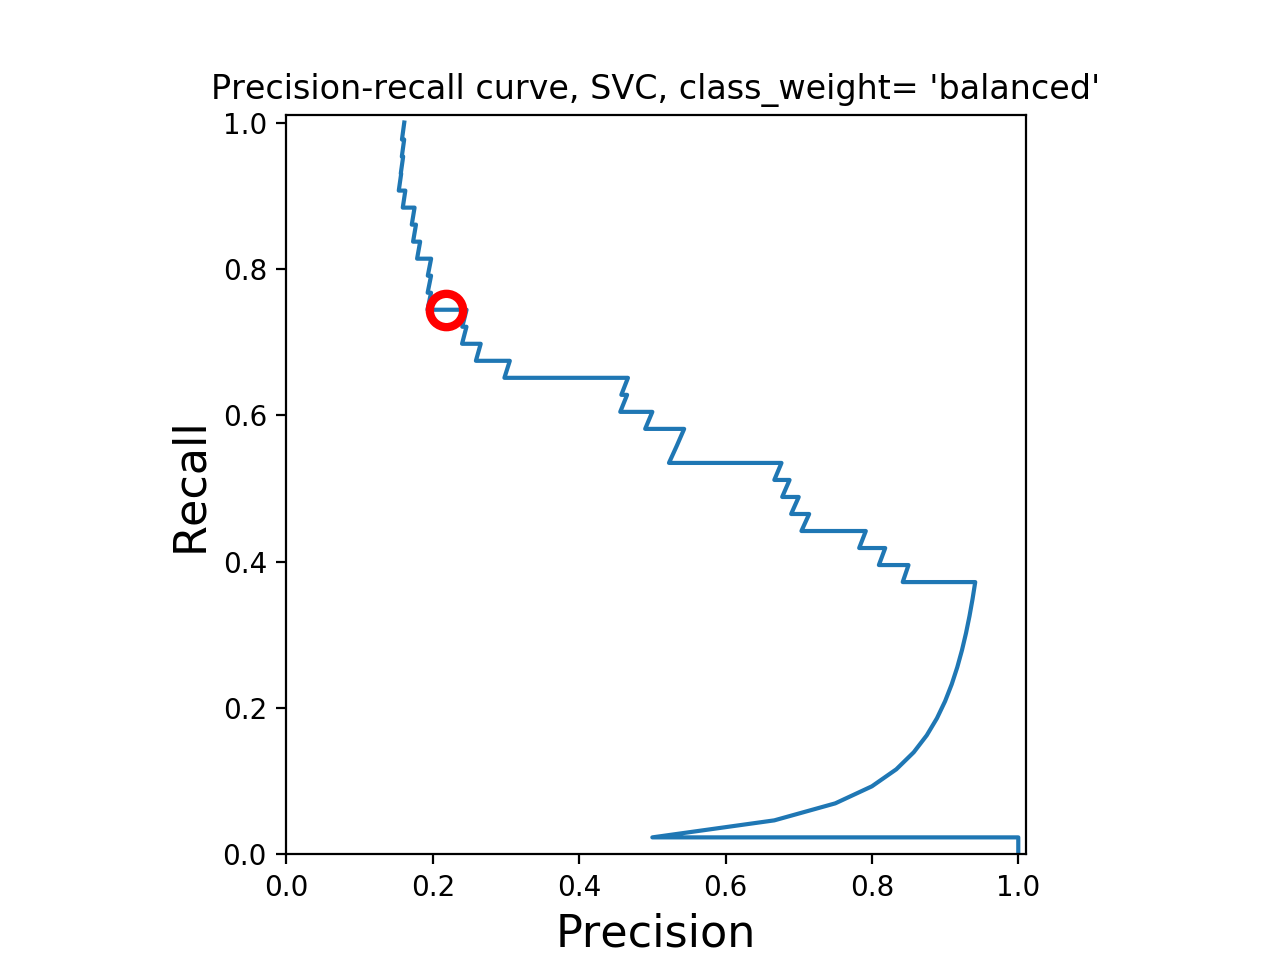

At zero threshold, precision: 0.22, recall: 0.74


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [71]:
clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)
# get scores
y_scores = clf.decision_function(X_twovar_test)
# get precision, recall and threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
# get maximum point for precision and recall
closest_zero = np.argmin(np.abs(thresholds))
# slice max point
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

# plot class region
plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

# plot precision-recall curve
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title("Precision-recall curve, SVC, class_weight= 'balanced'")
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

Note: This tutorial on model evaluation and selection tool a lot of inspoiration from `Applied Machine Learning in Python` by Mchicagan State on Coursera
